In [2]:
import random

import numpy as np
import torch
import math
import torch.nn as nn
from PIL import Image
from torch.autograd import Variable
from torchvision.transforms import transforms

from commons import inc_convolution, inc_max_pool
from imagenet_classes import class_names
from vgg16 import VGG16

import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
batch_size = 1
patch_size = 16
input_size = 224

p = (input_size - patch_size)//2
patch_locations = [(p, p)]*batch_size

loader = transforms.Compose([transforms.Resize([224, 224]), transforms.ToTensor()])
images = Image.open('./dog_resized.jpg')
images = loader(images)

images = images.unsqueeze(0)
images_batch = images.repeat(batch_size, 1, 1, 1)

image_patch = torch.cuda.FloatTensor(3, patch_size, patch_size).fill_(0)

for i,(x,y) in enumerate(patch_locations):
    images_batch[i, :, x:x+patch_size, y:y+patch_size] = image_patch

y = VGG16().forward(images_batch.cuda())

image_patches = image_patch.unsqueeze(0).repeat(batch_size, 1, 1, 1)
patch_locations = torch.from_numpy(np.array(patch_locations, dtype=np.int32))

inc_model = VGG16(beta=0.2)

inc_model.eval()
inc_model.forward_materialized(images)
x = inc_model.forward_gpu(image_patches, patch_locations, patch_size, patch_size)

(tensor([[ 103,  103]], dtype=torch.int32, device='cuda:0'), 18, torch.Size([1, 64, 18, 18]))
(tensor([[ 102,  102]], dtype=torch.int32, device='cuda:0'), 20, torch.Size([1, 64, 20, 20]))
(tensor([[ 51,  51]], dtype=torch.int32, device='cuda:0'), 11, torch.Size([1, 64, 11, 11]))
(tensor([[ 50,  50]], dtype=torch.int32, device='cuda:0'), 13, torch.Size([1, 128, 13, 13]))
(tensor([[ 49,  49]], dtype=torch.int32, device='cuda:0'), 15, torch.Size([1, 128, 15, 15]))
(tensor([[ 24,  24]], dtype=torch.int32, device='cuda:0'), 8, torch.Size([1, 128, 8, 8]))
(tensor([[ 23,  23]], dtype=torch.int32, device='cuda:0'), 10, torch.Size([1, 256, 10, 10]))
(tensor([[ 22,  22]], dtype=torch.int32, device='cuda:0'), 12, torch.Size([1, 256, 12, 12]))
(tensor([[ 22,  22]], dtype=torch.int32, device='cuda:0'), 12, torch.Size([1, 256, 12, 12]))
(tensor([[ 11,  11]], dtype=torch.int32, device='cuda:0'), 6, torch.Size([1, 256, 6, 6]))
(tensor([[ 10,  10]], dtype=torch.int32, device='cuda:0'), 8, torch.Size([1

In [4]:
s = 4
p = 5
#temp = x - y[:,:,p:p+s,p:p+s]

temp = y-x

temp = temp.cpu().data.numpy()
print(np.max(np.abs(temp)))

7.3735347


In [5]:
print(x.shape)
114 > round(224*0.5) and 114 >= 3
remove_y = max(2, ((114 - round(224 * 0.5))//2)*2)
remove_y
min(int(math.ceil((114-remove_y+2-1)*1.0/2)), 112)

torch.Size([1, 512, 7, 7])


57

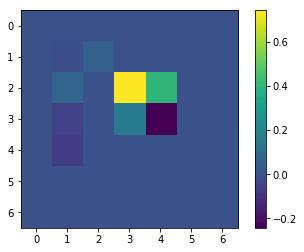

In [22]:
plt.imshow(temp[0,15])
plt.colorbar()

In [7]:
temp[0,0,:,:]

array([[ 0.0000000e+00,  0.0000000e+00,  2.0147681e-02,  1.8095613e-02,
         4.7165811e-02,  5.6624413e-06,  1.1920929e-07],
       [ 0.0000000e+00, -3.0672073e-02,  3.0280828e-02, -3.9072037e-03,
         7.3199034e-02,  7.7190638e-02,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         2.1409158e-01,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  1.4442629e-01, -1.0073185e-05],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  7.7398121e-03, -6.7353249e-06],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)